# Business Problem

The dataset contains house sale features and prices for King County. These properties have been sold between May 2014 and May 2015. The goal is to develop a Machine Learning model to predict house prices on unseen data samples.

You can download it from this link: https://drive.google.com/file/d/1xZP6fQW1pFhfGE5Kxs0Uam4azSck0VDa/view?usp=sharing

The first step in every ML problem is to explore and pre-process data for a better overall model performance with low bias. 

There are 21 columns in this dataset:

2 categorical columns (id, date) and
17 continuous columns

# Tech Stack

In this project we will use Python language for its ease of use, open-source libraries and available cloud environments such as Google Colaboratory and Kaggle.

This project relies heavily on these libraries: 
 
*   NumPy for vector operations
*   Pandas for Data Manipulation
*   Matplotlib and Seaborn for Data Visualization
*   scikit-learn for ML modeling and ML related operations




# Importing libraries

In [1]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


# Reading data file

In [2]:
data=pd.read_csv("/content/drive/MyDrive/GMC Datasets/kc_house_data.csv")

In [3]:
data.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.161300e+04  2.161300e+04  21613.000000  21613.000000  21613.000000   
mean   4.580302e+09  5.400881e+05      3.370842      2.114757   2079.899736   
std    2.876566e+09  3.671272e+05      0.930062      0.770163    918.440897   
min    1.000102e+06  7.500000e+04      0.000000      0.000000    290.000000   
25%    2.123049e+09  3.219500e+05      3.000000      1.750000   1427.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  21613.000000   
mean   1.510697e+04      1.494309      0.007542      0.234303      3.409430   
std    4.142051e+04      0.539989      0.086517      0.766318      0.650743   
min    5.200000e+02      1.000000      0.000000      0.000000      1.000000   
25%    5.040000e+03      1.000000      0.000000      0.000000      3.000000   
50%    7.618000e+03      1.500000      0.000000      0.000000      3.000000   
75%    1.068800e+04      2.000000      0.000000      0.000000      4.000000   
max    1.651359e+06      3.500000      1.000000      4.000000      5.000000   

              grade    sqft_above  sqft_basement      yr_built  yr_renovated  \
count  21613.000000  21613.000000   21613.000000  21613.000000  21613.000000   
mean       7.656873   1788.390691     291.509045   1971.005136     84.402258   
std        1.175459    828.090978     442.575043     29.373411    401.679240   
min        1.000000    290.000000       0.000000   1900.000000      0.000000   
25%        7.000000   1190.000000       0.000000   1951.000000      0.000000   
50%        7.000000   1560.000000       0.000000   1975.000000      0.000000   
75%        8.000000   2210.000000     560.000000   1997.000000      0.000000   
max       13.000000   9410.000000    4820.000000   2015.000000   2015.000000   

            zipcode           lat          long  sqft_living15     sqft_lot15  
count  21613.000000  21613.000000  21613.000000   21613.000000   21613.000000  
mean   98077.939805     47.560053   -122.213896    1986.552492   12768.455652  
std       53.505026      0.138564      0.140828     685.391304   27304.179631  
min    98001.000000     47.155900   -122.519000     399.000000     651.000000  
25%    98033.000000     47.471000   -122.328000    1490.000000    5100.000000  
50%    98065.000000     47.571800   -122.230000    1840.000000    7620.000000  
75%    98118.000000     47.678000   -122.125000    2360.000000   10083.000000  
max    98199.000000     47.777600   -121.315000    6210.000000  871200.000000

In [4]:
print(data.columns)

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [5]:
data.head()

id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933             0    98028  47.7379 -122.233           2720   
3      1965             0    98136  47.5208 -122.393           1360   
4      1987             0    98074  47.6168 -122.045           1800   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503  

[5 rows x 21 columns]

# Data Exploration

In [6]:
# Check null values

data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [7]:
# Check duplicated values

data.duplicated().sum()

0

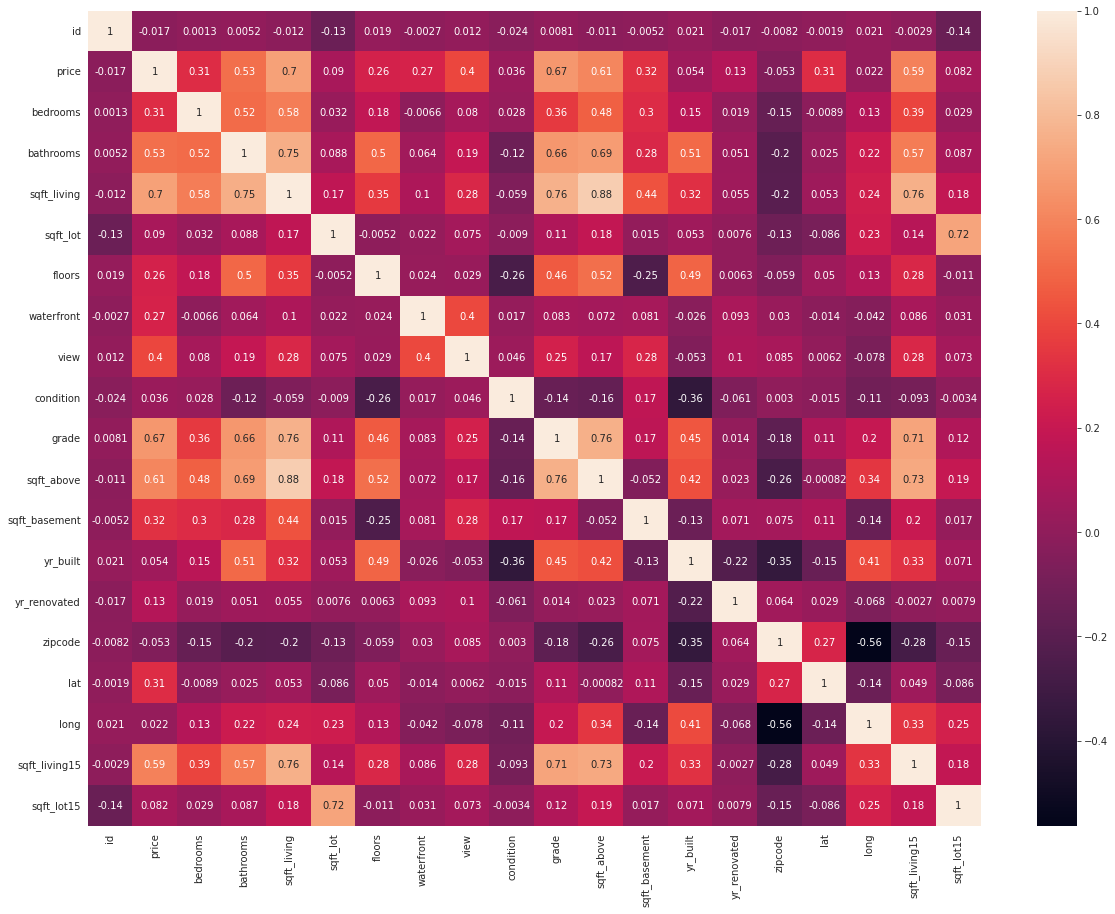

In [8]:
# Correlation Matrix

cormap = data.corr()
plt.figure(figsize=(20,15))
sns.heatmap(cormap, annot=True)
plt.show()

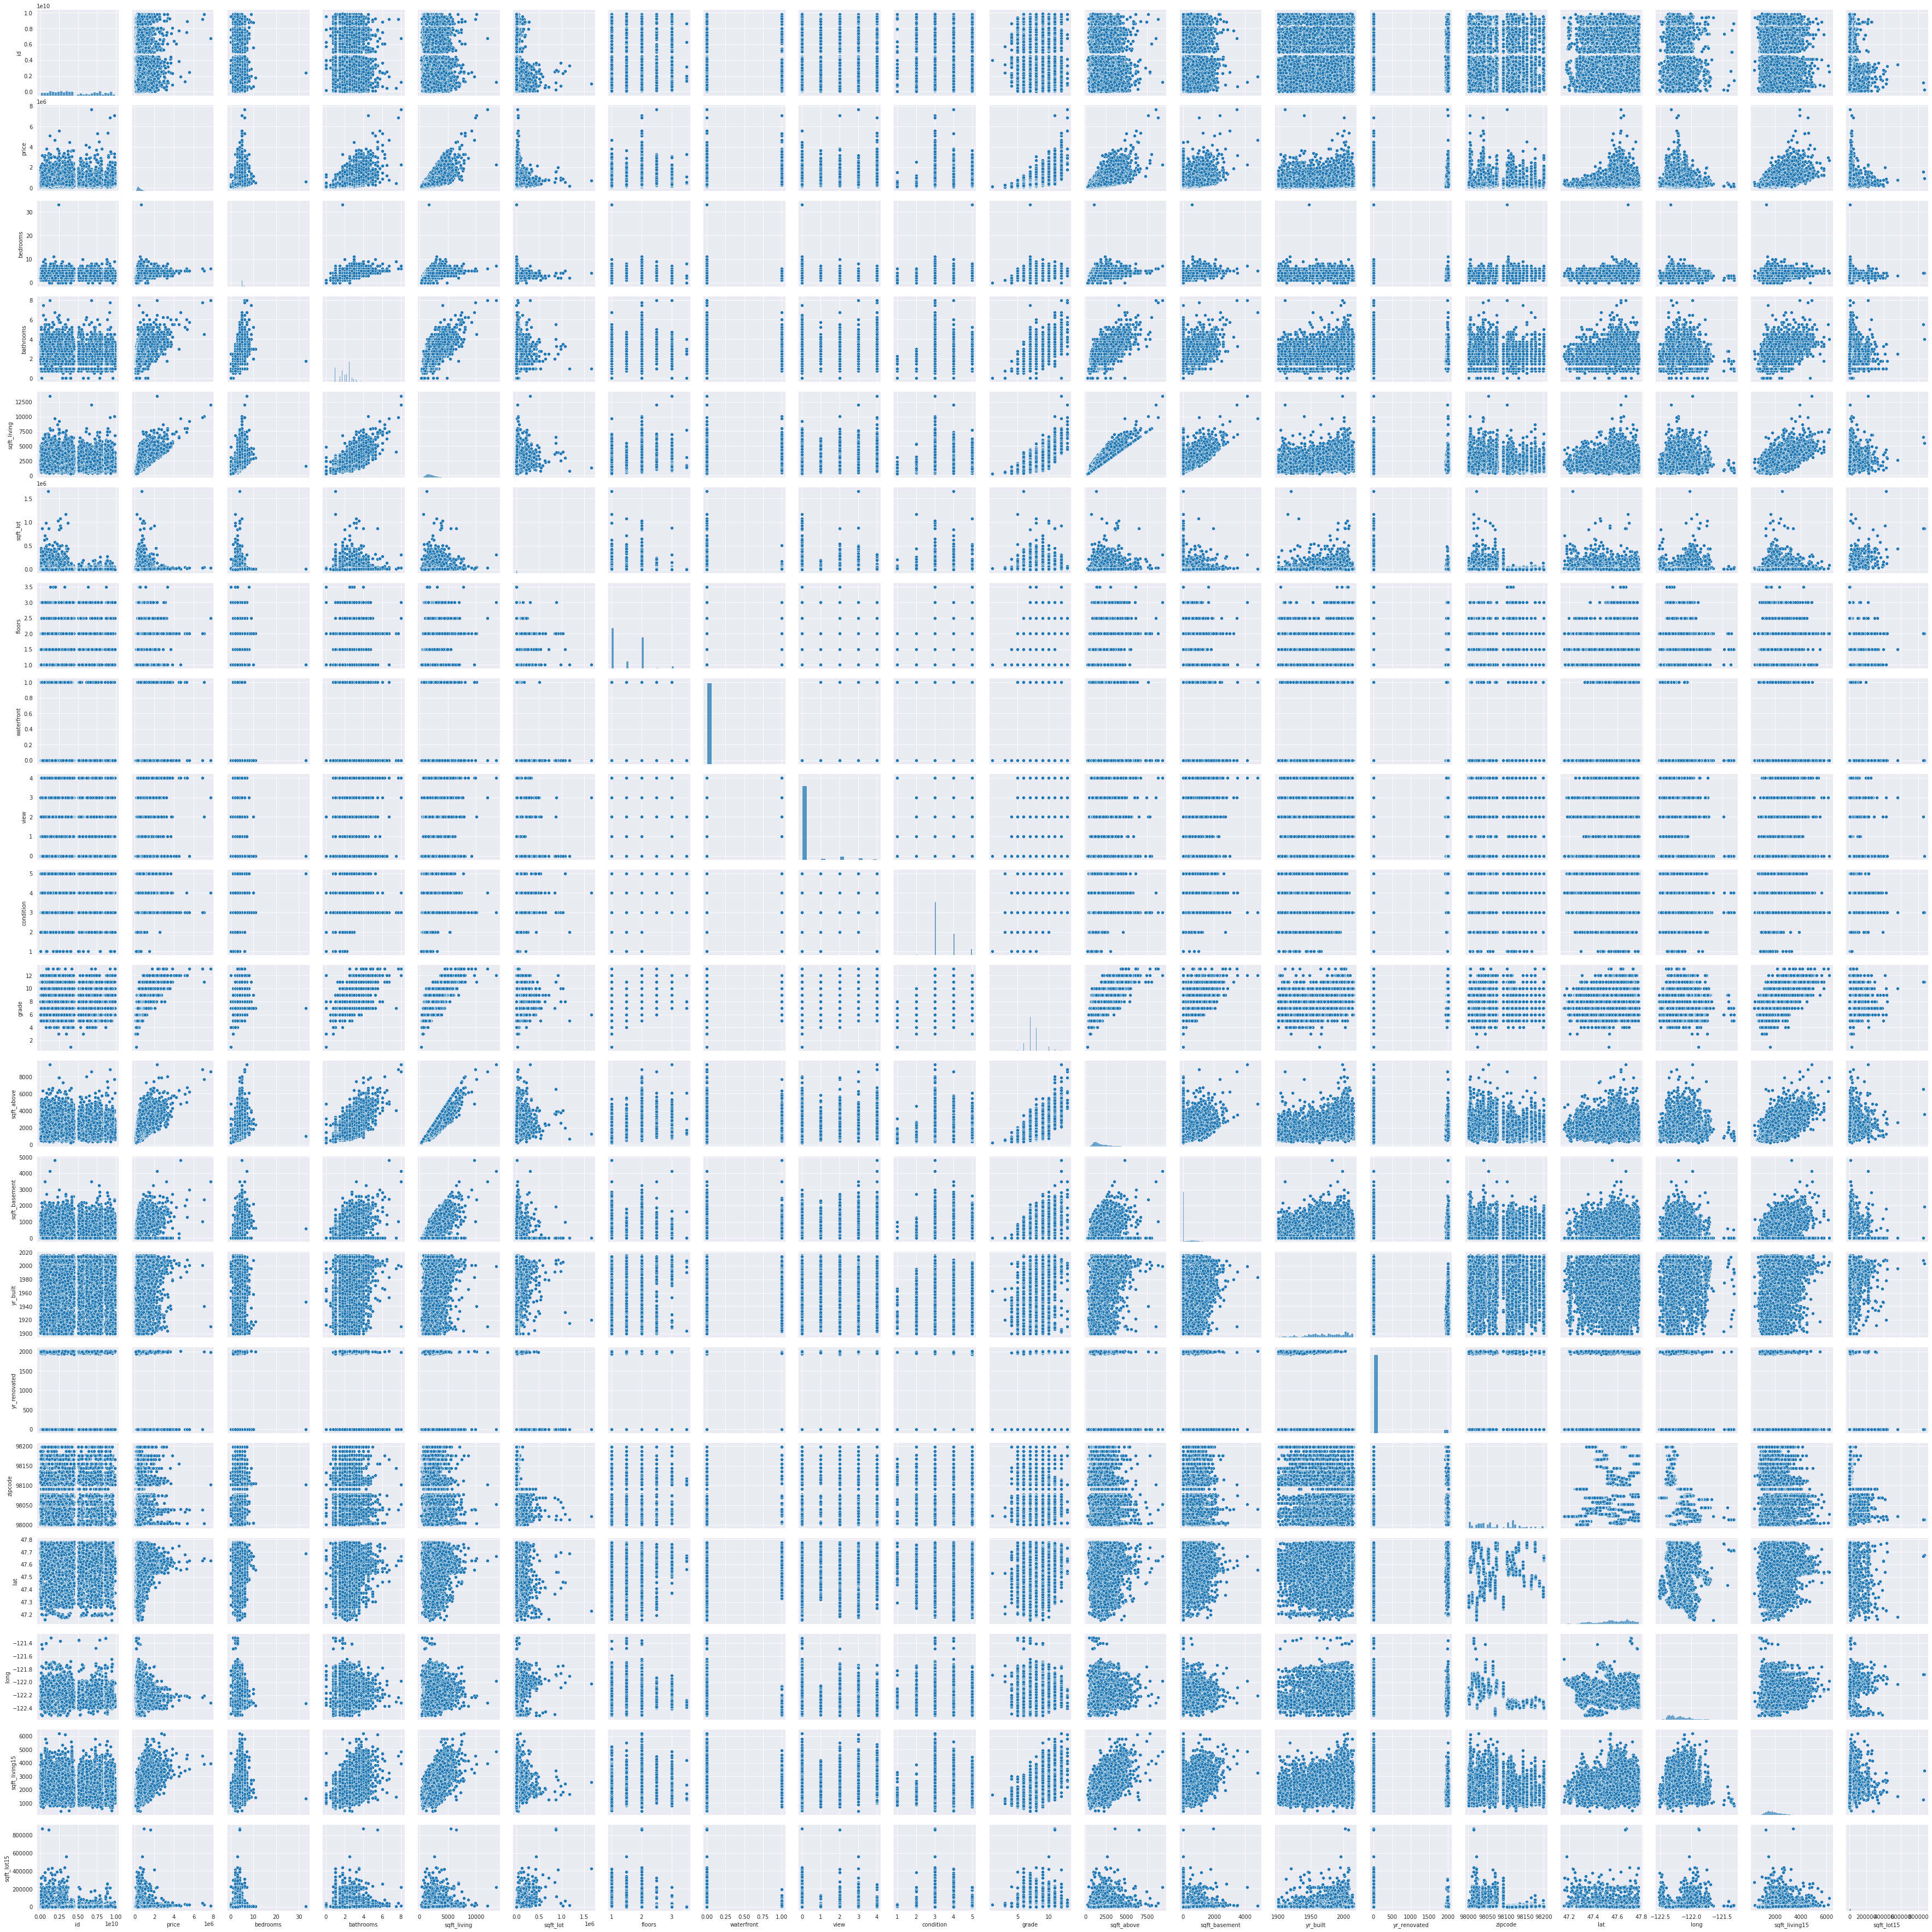

In [9]:
# Create the default pairplot
sns.pairplot(data)


# Data Pre-processing

In [10]:
#Drop id column and specify target column

target = data['price']
data = data.drop(['price','id'], axis = 1)
data.head()

date  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0  20141013T000000         3       1.00         1180      5650     1.0   
1  20141209T000000         3       2.25         2570      7242     2.0   
2  20150225T000000         2       1.00          770     10000     1.0   
3  20141209T000000         4       3.00         1960      5000     1.0   
4  20150218T000000         3       2.00         1680      8080     1.0   

   waterfront  view  condition  grade  sqft_above  sqft_basement  yr_built  \
0           0     0          3      7        1180              0      1955   
1           0     0          3      7        2170            400      1951   
2           0     0          3      6         770              0      1933   
3           0     0          5      7        1050            910      1965   
4           0     0          3      8        1680              0      1987   

   yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  
0             0    98178  47.5112 -122.257           1340        5650  
1          1991    98125  47.7210 -122.319           1690        7639  
2             0    98028  47.7379 -122.233           2720        8062  
3             0    98136  47.5208 -122.393           1360        5000  
4             0    98074  47.6168 -122.045           1800        7503

In [11]:
print(target)

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21608    360000.0
21609    400000.0
21610    402101.0
21611    400000.0
21612    325000.0
Name: price, Length: 21613, dtype: float64

In [12]:
data['date'] = pd.to_datetime(data['date'])
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month
data['day'] = data['date'].dt.day

data = data.drop("date",axis=1)

data.head()

bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
0         3       1.00         1180      5650     1.0           0     0   
1         3       2.25         2570      7242     2.0           0     0   
2         2       1.00          770     10000     1.0           0     0   
3         4       3.00         1960      5000     1.0           0     0   
4         3       2.00         1680      8080     1.0           0     0   

   condition  grade  sqft_above  ...  yr_built  yr_renovated  zipcode  \
0          3      7        1180  ...      1955             0    98178   
1          3      7        2170  ...      1951          1991    98125   
2          3      6         770  ...      1933             0    98028   
3          5      7        1050  ...      1965             0    98136   
4          3      8        1680  ...      1987             0    98074   

       lat     long  sqft_living15  sqft_lot15  year  month  day  
0  47.5112 -122.257           1340        5650  2014     10   13  
1  47.7210 -122.319           1690        7639  2014     12    9  
2  47.7379 -122.233           2720        8062  2015      2   25  
3  47.5208 -122.393           1360        5000  2014     12    9  
4  47.6168 -122.045           1800        7503  2015      2   18  

[5 rows x 21 columns]

In [13]:
#Split Data into Train/Test with 80% of data for training

X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42, train_size=0.8, shuffle=True)
print ("train size={}, test size={}, total_size={}".format(
    X_train.shape[0], X_test.shape[0], data.shape[0])
)

train size=17290, test size=4323, total_size=21613


# ML Models


In [14]:
#Linear Regression Model
#To learn more about linear regression please follow this link : https://jakevdp.github.io/PythonDataScienceHandbook/05.06-linear-regression.html
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Linear regression r2 score: ", r2_score(y_test,y_pred))

Linear regression r2 score:  0.7026559760834294


In [18]:
#ElasticNet Model with hyper-parameter max_iter = 1000000

from sklearn.linear_model import ElasticNet

el_model = ElasticNet(max_iter=1000000)
el_model.fit(X_train, y_train)
y_pred = el_model.predict(X_test)
print("ElasticNet r2 score: ", r2_score(y_test,y_pred))

ElasticNet r2 score:  0.6148980880731945


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.541e+14, tolerance: 2.259e+11
  model = cd_fast.enet_coordinate_descent(


In [16]:
#Decision Tree Model
#To learn more about decision trees and random forest please follow this link : https://jakevdp.github.io/PythonDataScienceHandbook/05.08-random-forests.html

from sklearn.tree import DecisionTreeRegressor

tree_regressor = DecisionTreeRegressor()
tree_regressor.fit(X_train, y_train)
y_pred = tree_regressor.predict(X_test)
print("Decision Tree r2 score: ", r2_score(y_test,y_pred))

Decision Tree r2 score:  0.686131522607714


In [17]:
#Random Forest Model
#To learn more about decision trees and random forest please follow this link : https://jakevdp.github.io/PythonDataScienceHandbook/05.08-random-forests.html

from sklearn.ensemble import RandomForestRegressor

forest_regressor = RandomForestRegressor()
forest_regressor.fit(X_train, y_train)
y_pred = forest_regressor.predict(X_test)
print("Random Forest r2 score: ", r2_score(y_test,y_pred))

Random Forest r2 score:  0.8570455475818424
